# KMEANS CLUSTERING BASICS STEPS

## Euclidean Distance Formula

### In 2D Space

Consider two points **(x₁, y₁)** and **(x₂, y₂)** in a 2-dimensional space. The Euclidean Distance **d** between them is given by the formula:

**d = √[(x₂ - x₁)² + (y₂ - y₁)²]**

**Where:**
- **d** is the Euclidean Distance  
- **(x₁, y₁)** is the coordinate of the first point  
- **(x₂, y₂)** is the coordinate of the second point  

---

### In 3D Space

If the two points are **(x₁, y₁, z₁)** and **(x₂, y₂, z₂)** in a 3-dimensional space, the Euclidean Distance is:

**d = √[(x₂ - x₁)² + (y₂ - y₁)² + (z₂ - z₁)²]**

**Where:**
- **d** is the Euclidean Distance  
- **(x₁, y₁, z₁)** is the coordinate of the first point  
- **(x₂, y₂, z₂)** is the coordinate of the second point  


## 🔶 What is K-Means Clustering?

K-Means is an **unsupervised machine learning algorithm** used to **partition a dataset into K distinct, non-overlapping groups** (clusters) based on feature similarity.

---

## ✅ Step-by-Step Procedure of K-Means Clustering:

---

### **Step 1: Choose the Number of Clusters (K)**

- You decide how many clusters you want the data to be grouped into.
- This value, **K**, is a **hyperparameter** and can be chosen using:
  - **Domain knowledge**
  - **Elbow Method**
  - **Silhouette Score**

---

### **Step 2: Initialize K Centroids Randomly**

- Select **K data points randomly** from the dataset as the **initial centroids** (centers of clusters).
- Centroid = Mean of all the points in a cluster.
- Let these centroids be:

$$
C_1, C_2, \dots, C_K
$$

---

### **Step 3: Assign Each Point to the Nearest Centroid (Cluster Assignment)**

- For each data point \( x_i \), compute the **Euclidean distance** to each centroid \( C_k \):

$$
d(x_i, C_k) = \sqrt{\sum_{j=1}^{n} (x_{ij} - C_{kj})^2}
$$

Where:
- \( x_{ij} \): j-th feature of point \( x_i \)  
- \( C_{kj} \): j-th feature of centroid \( C_k \)

- Assign the point to the cluster whose centroid is **closest**.

---

### **Step 4: Update the Centroids**

- After all points are assigned to a cluster, update the centroids:

$$
C_k = \frac{1}{|S_k|} \sum_{x_i \in S_k} x_i
$$

Where:
- \( S_k \): the set of points assigned to cluster \( k \)  
- \( |S_k| \): number of points in cluster \( k \)

- This moves each centroid to the **mean** of the points in its cluster.

---

### **Step 5: Repeat Steps 3 and 4 Until Convergence**

- Continue:
  1. Assigning points to nearest centroid
  2. Updating centroids

- **Stop when:**
  - Assignments no longer change, or  
  - Centroids stop moving significantly (below a small threshold \( \epsilon \)), or  
  - Max iterations reached

---

## 📉 Objective Function (What K-Means Optimizes)

K-Means aims to **minimize the Within-Cluster Sum of Squares (WCSS)**, also called **inertia**:

$$
J = \sum_{k=1}^{K} \sum_{x_i \in S_k} \| x_i - C_k \|^2
$$

- Lower value of \( J \) = tighter, better-defined clusters.  
- This is a **non-convex optimization** problem (but convex for fixed cluster assignments).

---

## 📌 Important Notes:

- **Distance Metric**: Euclidean distance is standard, but others like Manhattan can be used.
- **K-Means++**: Improved method for initializing centroids to avoid poor clustering due to random starts.
- **Limitations**:
  - Requires choosing K
  - Sensitive to outliers
  - Assumes spherical clusters of equal size

---

## 📊 Elbow Method to Choose K

Plot:
- **X-axis**: number of clusters (K)
- **Y-axis**: WCSS (inertia)

Choose K at the "elbow" point where the decrease in WCSS slows down.

---

## 🔁 Pseudocode Summary

```python
1. Initialize K centroids randomly
2. repeat:
    a. Assign each point to nearest centroid
    b. Update centroids
3. until convergence


## 1)It is funny that even though it is clustering algo but still first we have to assign the values of how many number of clusters you want 
## 2)Then Initialize the centroids 
## 3) Assign it to the clusters 
## 4) Move it to the centroids 
## 5) FINiSH

# LEts suppose we got 3 clusters so that means the algo will select 

## 3 After initiazing the centroids we will calculate the eucladian distance between the points  and then after that we will compare it with the centroid and the distance with minimum centroid will be assign to clusters

# 4 After assign the clusters then calculate the centroid ,to calculate it we have to take the mean of both the parameters of every point in that cluster and then we will get the centroid

# K-Means Clustering (Elbow Method) 
## it is use to calculate the amount of the clusters require in the KNN

# Coding 

In [1]:
import pandas as pd 
import numpy as np 

In [4]:
df=pd.read_csv('student_clustering.csv')
print("The shape of the data is ",df.shape)

The shape of the data is  (200, 2)


In [5]:
df.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


In [6]:
import matplotlib.pyplot as plt

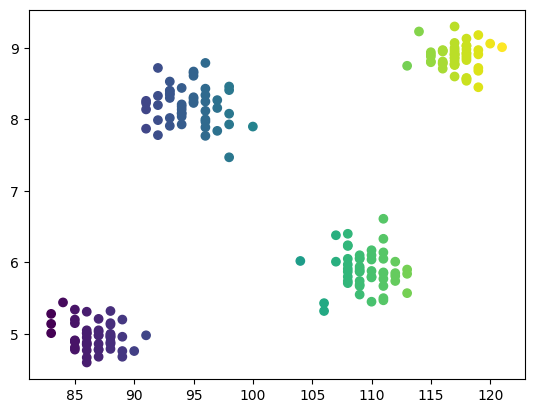

In [8]:
plt.scatter(df['iq'],df['cgpa'],c=df['iq'])

In [11]:
from sklearn.cluster import KMeans

In [14]:
wcss=[]
for i in range(1,21): 
    knn=KMeans(n_clusters=i)
    knn.fit_predict(df)
    wcss.append(knn.inertia_)
    

In [15]:
wcss

[29957.898288,
 4184.14127,
 2364.005583420083,
 681.9696599999999,
 530.4298616986189,
 427.9627769877213,
 361.35315251665804,
 273.6510757054303,
 221.4299794877214,
 194.07022345251366,
 163.71084765886292,
 133.51763354307909,
 126.00273113161208,
 114.16381114580682,
 104.62547025169489,
 78.07346750242122,
 76.24455702268321,
 61.14175673896365,
 52.85773762099829,
 56.47782314629942]

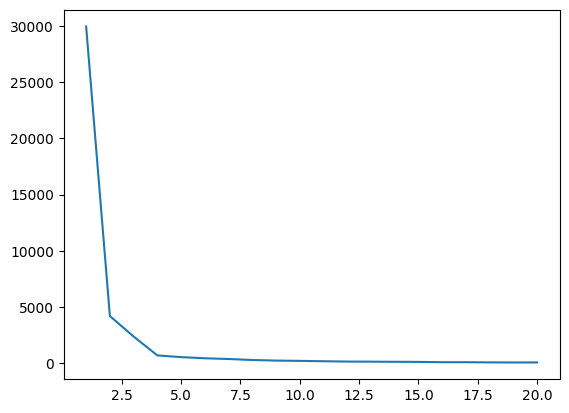

In [16]:
plt.y_lable
plt.plot(range(1,21),wcss)

In [17]:
X=df.iloc[:,:].values
km =KMeans(n_clusters=4)

In [20]:
y_means=km.fit_predict(X)

In [25]:
y_means

array([1, 2, 3, 3, 2, 2, 3, 0, 2, 3, 1, 2, 3, 1, 2, 3, 2, 3, 2, 2, 3, 1,
       3, 1, 1, 3, 1, 0, 3, 2, 0, 2, 0, 2, 3, 3, 0, 2, 1, 2, 1, 3, 3, 1,
       0, 0, 3, 2, 0, 2, 1, 1, 0, 3, 0, 2, 2, 0, 2, 0, 2, 3, 3, 0, 1, 0,
       3, 1, 2, 3, 2, 0, 3, 1, 2, 0, 2, 0, 1, 3, 3, 0, 2, 1, 0, 1, 0, 2,
       0, 2, 0, 0, 3, 1, 3, 3, 0, 3, 1, 0, 2, 1, 1, 0, 1, 1, 3, 1, 0, 0,
       3, 0, 2, 2, 3, 0, 3, 2, 0, 1, 1, 2, 3, 0, 3, 1, 3, 2, 1, 3, 3, 2,
       1, 1, 2, 0, 2, 1, 3, 3, 3, 1, 2, 1, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0,
       1, 3, 2, 0, 2, 3, 1, 0, 2, 3, 0, 1, 2, 1, 1, 0, 0, 2, 0, 1, 1, 3,
       0, 2, 1, 0, 0, 2, 2, 2, 3, 1, 3, 3, 0, 2, 3, 3, 1, 1, 3, 1, 0, 2,
       2, 0])

In [22]:
X[y_means==0,0]

array([8.8 , 9.18, 8.86, 8.83, 8.56, 8.96, 8.78, 8.45, 8.79, 8.81, 8.88,
       9.07, 8.92, 8.75, 8.71, 8.86, 9.3 , 9.01, 8.97, 9.  , 8.76, 8.78,
       9.23, 9.03, 9.13, 8.91, 8.98, 9.03, 8.86, 8.89, 8.97, 8.72, 8.93,
       8.58, 8.94, 8.6 , 8.77, 8.81, 8.54, 8.97, 8.91, 8.68, 9.06, 8.9 ,
       8.94, 8.91, 8.91, 8.95, 8.57, 8.82])

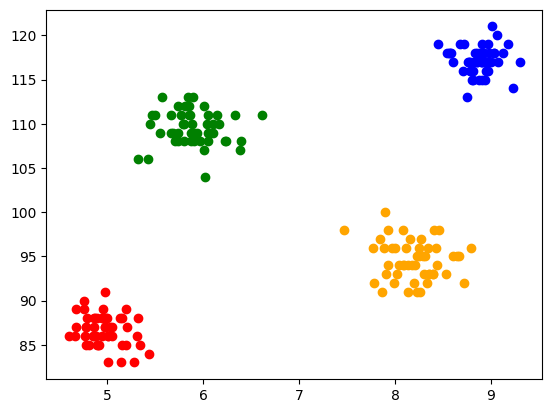

In [27]:
plt.scatter(X[y_means==0,0],X[y_means == 0,1],color='blue')
plt.scatter(X[y_means==1,0],X[y_means == 1,1],color='red')
plt.scatter(X[y_means==2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means==3,0],X[y_means == 3,1],color='orange')

# KMEANS FROM SCRATCH

In [12]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt 
import random

In [4]:
centroids=[(-5,-5),(5,5)]
cluster_std=[1,1]

In [5]:
X,y=make_blobs(n_samples=100,n_features=2,random_state=2,cluster_std=cluster_std,centers=centroids)

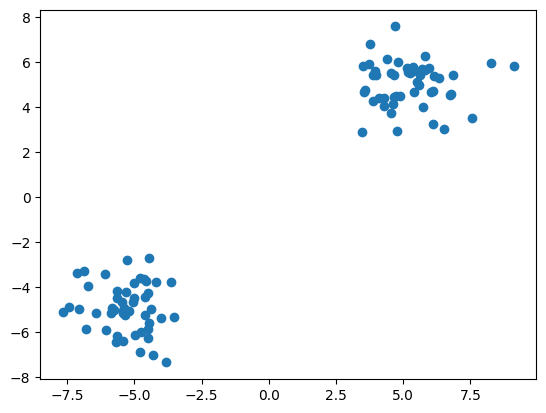

In [7]:
plt.scatter(X[:,0],X[:,1])

In [63]:
class Kmeans: 
    def __init__(self,n_clusters=2,max_iter=100): 
        self.n_clusters=n_clusters
        self.max_iter=max_iter
        self.centroids=None 

    def fit_predict(self,X):
        
        random_index =random.sample(range(0,X.shape[0]),self.n_clusters)
        self.centroids=X[random_index]

        for i in range(self.max_iter): 
            cluster_group=self.assign_clusters(X)


    
    def assign_clusters(self,X): 
        cluster_group=[]
        distances=[]

        for row in X: 
            for centroid in self.centroids: 
                
                
        return cluster_group

In [61]:
km=Kmeans(n_clusters=5,max_iter=100)

In [62]:
km.fit_predict(X)

[[ 5.36505352  5.77408203]
 [ 8.2797454   5.97086132]
 [ 6.83533272  5.44068987]
 [-6.42121723 -5.1534952 ]
 [ 4.54577215  5.51437072]]
